In [1]:
#!pip install xgboost
import pandas as pd
import xgboost as xgb

train = pd.read_csv('train_20201116.csv')
test = pd.read_csv('test_20201116.csv')

In [2]:
test.head()

,Unnamed: 0,Timestamp,Values,meter_description,activity,Temperature,holiday,Weekday,Hour,Month,...,m_desc_other,hr_sin,hr_cos,mnth_sin,mnth_cos,day_sin,day_cos,weekday_sin,weekday_cos,year
0,33896,2016-01-01 00:00:00+00:00,15838241.0,other,laboratory,5.0,1,4,0,1,...,1,0.000000,1.000000,0.0,1.0,0.0,1.0,1.0,6.123234e-17,2016
1,33897,2016-01-01 01:00:00+00:00,15838284.0,other,laboratory,5.0,1,4,1,1,...,1,0.258819,0.965926,0.0,1.0,0.0,1.0,1.0,6.123234e-17,2016
2,33898,2016-01-01 02:00:00+00:00,15838314.0,other,laboratory,5.0,1,4,2,1,...,1,0.500000,0.866025,0.0,1.0,0.0,1.0,1.0,6.123234e-17,2016
3,33899,2016-01-01 03:00:00+00:00,15838356.0,other,laboratory,5.2,1,4,3,1,...,1,0.707107,0.707107,0.0,1.0,0.0,1.0,1.0,6.123234e-17,2016
4,33900,2016-01-01 04:00:00+00:00,15838399.0,other,laboratory,5.2,1,4,4,1,...,1,0.866025,0.500000,0.0,1.0,0.0,1.0,1.0,6.123234e-17,2016


In [3]:
train.head()

,Unnamed: 0,Timestamp,Values,meter_description,activity,Temperature,holiday,Weekday,Hour,Month,...,m_desc_other,hr_sin,hr_cos,mnth_sin,mnth_cos,day_sin,day_cos,weekday_sin,weekday_cos,year
0,0,2012-01-01 01:00:00+00:00,11087284.0,other,laboratory,3.9,1,6,1,1,...,1,0.258819,0.965926,0.0,1.0,0.0,1.0,0.5,-0.866025,2012
1,1,2012-01-01 02:00:00+00:00,11087381.0,other,laboratory,4.1,1,6,2,1,...,1,0.500000,0.866025,0.0,1.0,0.0,1.0,0.5,-0.866025,2012
2,2,2012-01-01 03:00:00+00:00,11087488.0,other,laboratory,4.2,1,6,3,1,...,1,0.707107,0.707107,0.0,1.0,0.0,1.0,0.5,-0.866025,2012
3,3,2012-01-01 04:00:00+00:00,11087594.0,other,laboratory,4.1,1,6,4,1,...,1,0.866025,0.500000,0.0,1.0,0.0,1.0,0.5,-0.866025,2012
4,4,2012-01-01 05:00:00+00:00,11087689.0,other,laboratory,4.3,1,6,5,1,...,1,0.965926,0.258819,0.0,1.0,0.0,1.0,0.5,-0.866025,2012


In [68]:
#train = train[train['meter_id'] == 3810110.0]
#test = test[test['meter_id'] == 3810110.0]

#train = train.drop(['Unnamed: 0','meter_id','site_id','Values'], axis = 1)
#test = test.drop(['Unnamed: 0','meter_id','site_id','Values'], axis = 1)

#train['Timestamp'] = train['Timestamp'].str[:-6]
#test['Timestamp'] = test['Timestamp'].str[:-6]

In [69]:
#train['Timestamp'] = pd.to_datetime(train['Timestamp'])
#test['Timestamp'] = pd.to_datetime(test['Timestamp'])

In [22]:
train.columns

Index(['Unnamed: 0', 'Timestamp', 'Values', 'meter_description', 'activity',
       'Temperature', 'holiday', 'Weekday', 'Hour', 'Month', 'Day',
       'Time Delta', 'value delta', 'tv delta', 'activity_laboratory',
       'm_desc_other', 'hr_sin', 'hr_cos', 'mnth_sin', 'mnth_cos', 'day_sin',
       'day_cos', 'weekday_sin', 'weekday_cos', 'year'],
      dtype='object')

In [76]:
#train['Time Delta'] = train['Timestamp'] - train['Timestamp'].shift(periods=1, axis=0)
#train['value delta'] = train['uniform values'] - train['uniform values'].shift(periods=1, axis=0)

#oneday = pd.Timedelta(days=1)

#train['Time Delta'] = train['Time Delta']/np.timedelta64(1,'h')
#train['tv delta'] = train['value delta']/train['Time Delta']

#test['Time Delta'] = test['Timestamp'] - test['Timestamp'].shift(periods=1, axis=0)
#test['value delta'] = test['uniform values'] - test['uniform values'].shift(periods=1, axis=0)

#oneday = pd.Timedelta(days=1)

#test['Time Delta'] = test['Time Delta']/np.timedelta64(1,'h')
#test['tv delta'] = test['value delta']/test['Time Delta']

In [80]:
#train[['Timestamp','tv delta','uniform values']]

,Timestamp,tv delta,uniform values
4,2012-01-01 10:00:00,NaN,889030.0
31,2012-01-02 18:00:00,18.531250,889623.0
32,2012-01-02 19:00:00,19.000000,889642.0
35,2012-01-02 23:00:00,18.750000,889717.0
54,2012-01-03 20:00:00,18.666667,890109.0
...,...,...,...
30089,2015-12-28 18:00:00,14.684211,1358055.0
30103,2015-12-29 09:00:00,14.800000,1358277.0
30127,2015-12-30 18:00:00,14.878788,1358768.0
30128,2015-12-30 19:00:00,14.000000,1358782.0


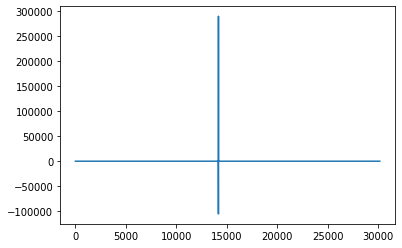

In [78]:
#train['tv delta'].plot()

In [2]:
train = train.drop([0])

X_train = train.drop(['Unnamed: 0','Values','Timestamp', 
                      'meter_description', 'activity','Time Delta',
                      'Weekday', 'Hour','Month', 'Day',
                      'value delta', 'tv delta'], axis = 1)
y_train = train['tv delta']
X_test = test.drop(['Unnamed: 0','Values','Timestamp', 
                      'meter_description', 'activity','Time Delta',
                      'Weekday', 'Hour','Month', 'Day',
                      'value delta', 'tv delta'], axis = 1)
y_test = test['tv delta']


In [24]:
y_train.head()

1     97.0
2    107.0
3    106.0
4     95.0
5    103.0
Name: tv delta, dtype: float64

In [29]:
X_train.head()

,Temperature,holiday,activity_laboratory,m_desc_other,hr_sin,hr_cos,mnth_sin,mnth_cos,day_sin,day_cos,weekday_sin,weekday_cos,year
1,4.1,1,1,1,0.500000,8.660254e-01,0.0,1.0,0.0,1.0,0.5,-0.866025,2012
2,4.2,1,1,1,0.707107,7.071068e-01,0.0,1.0,0.0,1.0,0.5,-0.866025,2012
3,4.1,1,1,1,0.866025,5.000000e-01,0.0,1.0,0.0,1.0,0.5,-0.866025,2012
4,4.3,1,1,1,0.965926,2.588190e-01,0.0,1.0,0.0,1.0,0.5,-0.866025,2012
5,4.1,1,1,1,1.000000,6.123234e-17,0.0,1.0,0.0,1.0,0.5,-0.866025,2012


In [10]:
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)
# model training
params = {'seed': 33,
          'objective': 'reg:linear',
          'silent': 0,
          'nthread': 1,
          'max_depth': 6,
          'learning_rate': 0.3}
num_round = 5000
evallist = [(dtrain, 'train'), (dtest, 'eval')]
bst = xgb.train(params, dtrain, num_round, evallist, early_stopping_rounds=100)
train['pred'] = bst.predict(xgb.DMatrix(X_train))
test['pred'] = bst.predict(xgb.DMatrix(X_test))


[09:46:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[09:46:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:111.84313	eval-rmse:86.42184
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 100 rounds.
[1]	train-rmse:84.17408	eval-rmse:62.61742
[2]	train-rmse:67.90019	eval-rmse:47.67882
[3]	train-rmse:55.15008	eval-rmse:40.42290
[4]	train-rmse:47.92144	eval-rmse:36.87249
[5]	train-rmse:44.07528	eval-rmse:35.49182
[6]	train-rmse:40.90662	eval-rmse:35

### BEST PARAMETERS below

In [3]:
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)
# model training
params = {'seed': 33,
          'objective': 'reg:squarederror',
          'silent': 0,
          'nthread': 1,
          'max_depth': 2,
          'learning_rate': 0.1}
num_round = 5000
evallist = [(dtrain, 'train'), (dtest, 'eval')]
bst = xgb.train(params, dtrain, num_round, evallist, early_stopping_rounds=50)
train['pred'] = bst.predict(xgb.DMatrix(X_train))
test['pred'] = bst.predict(xgb.DMatrix(X_test))


[09:18:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:137.60051	eval-rmse:110.11980
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 50 rounds.
[1]	train-rmse:126.52140	eval-rmse:98.56444
[2]	train-rmse:116.78997	eval-rmse:88.39431
[3]	train-rmse:108.21049	eval-rmse:79.39759
[4]	train-rmse:100.69499	eval-rmse:71.48518
[5]	train-rmse:94.17960	eval-rmse:64.67263
[6]	train-rmse:88.48762	eval-rmse:58.69458
[7]	train-rmse:83.59290	eval-rmse:53.66277
[8]	train-rmse:79.37151	eval-rmse:49.29720
[9]	train-rmse:75.77232	eval-rmse:45.71531
[10]	train-rmse:72.69520	eval-rmse:42

[173]	train-rmse:51.98593	eval-rmse:33.37697
[174]	train-rmse:51.97956	eval-rmse:33.35170
[175]	train-rmse:51.97312	eval-rmse:33.33047
[176]	train-rmse:51.96610	eval-rmse:33.33041
[177]	train-rmse:51.95957	eval-rmse:33.34316
[178]	train-rmse:51.95629	eval-rmse:33.34254
[179]	train-rmse:51.94677	eval-rmse:33.34855
[180]	train-rmse:51.94242	eval-rmse:33.34607
[181]	train-rmse:51.93779	eval-rmse:33.34887
[182]	train-rmse:51.93127	eval-rmse:33.33807
[183]	train-rmse:51.92707	eval-rmse:33.33212
[184]	train-rmse:51.91855	eval-rmse:33.32346
[185]	train-rmse:51.91231	eval-rmse:33.30821
[186]	train-rmse:51.90696	eval-rmse:33.30545
[187]	train-rmse:51.90322	eval-rmse:33.31094
[188]	train-rmse:51.89467	eval-rmse:33.31374
[189]	train-rmse:51.89224	eval-rmse:33.29252
[190]	train-rmse:51.88395	eval-rmse:33.30203
[191]	train-rmse:51.87980	eval-rmse:33.27385
[192]	train-rmse:51.87553	eval-rmse:33.27866
[193]	train-rmse:51.87044	eval-rmse:33.28131
[194]	train-rmse:51.86509	eval-rmse:33.29288
[195]	trai

In [4]:
xgb_fea_imp=pd.DataFrame(list(bst.get_fscore().items()),
columns=['feature','importance']).sort_values('importance', ascending=False)
print('',xgb_fea_imp)
#xgb_fea_imp.to_csv('xgb_fea_imp.csv')

#from xgboost import plot_importance
#plot_importance(xgb, )

         feature  importance
1   Temperature         238
5          year         154
2      mnth_sin         125
4      mnth_cos          62
0        hr_cos          55
10       hr_sin          40
3   weekday_cos          39
9   weekday_sin          37
6       day_cos          30
7       holiday          21
8       day_sin          21


In [ ]:
train = train.drop([0])

X_train = train.drop(['Unnamed: 0','Values','Timestamp', 
                      'meter_description', 'activity','Time Delta',
                      'Weekday', 'Hour','Month', 'Day',
                      'value delta', 'tv delta','day_sin','holiday'], axis = 1)
y_train = train['tv delta']
X_test = test.drop(['Unnamed: 0','Values','Timestamp', 
                      'meter_description', 'activity','Time Delta',
                      'Weekday', 'Hour','Month', 'Day',
                      'value delta', 'tv delta'], axis = 1)
y_test = test['tv delta']


In [50]:
train[['pred','tv delta']].head()

,pred,tv delta
1,119.209427,97.0
2,119.209427,107.0
3,121.709061,106.0
4,125.277863,95.0
5,124.158859,103.0


In [5]:
test['diff'] = test['pred'] - test['tv delta']
mask = test['diff']>=0
test[mask][['pred','tv delta', 'diff']].sort_values(by='diff').head()

,pred,tv delta,diff
15146,95.000755,95.0,0.000755
13818,95.006676,95.0,0.006676
12770,155.016708,155.0,0.016708
2547,91.019264,91.0,0.019264
3229,89.021088,89.0,0.021088


In [66]:
from sklearn.metrics import mean_squared_error
import numpy as np

print(np.sqrt(mean_squared_error(train['tv delta'],train['pred'])))
print(np.sqrt(mean_squared_error(test['tv delta'],test['pred'])))

51.421234225032954
33.32980930983181


In [67]:
train.to_csv('train_predictions.csv')
test.to_csv('test_predictions.csv')

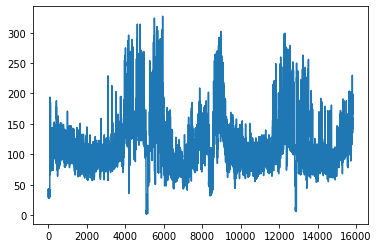

In [69]:
test['tv delta'].plot()

In [77]:
#train_no_outliers = train.drop(timestamp = '2012-08-20 09:00:00+00:00'
#2012-08-20 10:00:00+00:00
#)

train_no_outliers = train[train['Timestamp'] != '2012-08-20 09:00:00+00:00']
train_no_outliers = train_no_outliers[train_no_outliers['Timestamp'] != '2012-08-20 10:00:00+00:00']


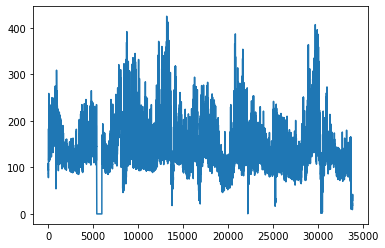

In [78]:
train_no_outliers['tv delta'].plot()

(array([4.000e+00, 1.900e+01, 1.270e+02, 7.850e+02, 3.327e+03, 9.023e+03,
        2.239e+03, 2.160e+02, 6.800e+01, 2.000e+01]),
 array([-196.29660416, -157.70477943, -119.11295471,  -80.52112999,
         -41.92930527,   -3.33748055,   35.25434418,   73.8461689 ,
         112.43799362,  151.02981834,  189.62164307]),
 <a list of 10 Patch objects>)

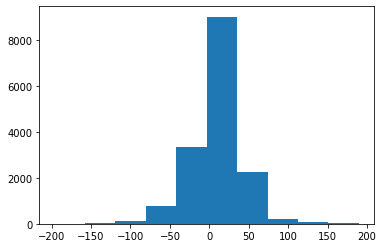

In [9]:
import matplotlib
from matplotlib.pyplot import hist

matplotlib.pyplot.hist(test['diff'])

In [85]:
X_train = train_no_outliers.drop(['Unnamed: 0','Values','Timestamp', 
                      'meter_description', 'activity','Time Delta',
                      'Weekday', 'Hour','Month', 'Day',
                      'value delta', 'tv delta','pred'], axis = 1)
y_train = train_no_outliers['tv delta']
X_test = test.drop(['Unnamed: 0','Values','Timestamp', 
                      'meter_description', 'activity','Time Delta',
                      'Weekday', 'Hour','Month', 'Day',
                      'value delta', 'tv delta','diff','pred'], axis = 1)
y_test = test['tv delta']


In [86]:
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)
# model training
params = {'seed': 33,
          'objective': 'reg:squarederror',
          'silent': 0,
          'nthread': 1,
          'max_depth': 2,
          'learning_rate': 0.1}
num_round = 5000
evallist = [(dtrain, 'train'), (dtest, 'eval')]
bst = xgb.train(params, dtrain, num_round, evallist, early_stopping_rounds=50)
train_no_outliers['pred'] = bst.predict(xgb.DMatrix(X_train))
test['pred'] = bst.predict(xgb.DMatrix(X_test))


[23:41:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:131.89745	eval-rmse:110.21201
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 50 rounds.
[1]	train-rmse:120.31408	eval-rmse:98.66226
[2]	train-rmse:110.01590	eval-rmse:88.34717
[3]	train-rmse:100.88903	eval-rmse:79.37698
[4]	train-rmse:92.77935	eval-rmse:71.44437
[5]	train-rmse:85.66145	eval-rmse:64.62703
[6]	train-rmse:79.37779	eval-rmse:58.65525
[7]	train-rmse:73.87963	eval-rmse:53.62271
[8]	train-rmse:69.05177	eval-rmse:49.29236
[9]	train-rmse:64.88174	eval-rmse:45.70845
[10]	train-rmse:61.25470	eval-rmse:42.

[173]	train-rmse:34.31454	eval-rmse:33.21783
[174]	train-rmse:34.29898	eval-rmse:33.21785
[175]	train-rmse:34.28973	eval-rmse:33.22998
[176]	train-rmse:34.28445	eval-rmse:33.23779
[177]	train-rmse:34.27497	eval-rmse:33.24019
[178]	train-rmse:34.26909	eval-rmse:33.24375
[179]	train-rmse:34.26217	eval-rmse:33.19832
[180]	train-rmse:34.25183	eval-rmse:33.19176
[181]	train-rmse:34.24249	eval-rmse:33.17655
[182]	train-rmse:34.22116	eval-rmse:33.18640
[183]	train-rmse:34.21379	eval-rmse:33.18728
[184]	train-rmse:34.20649	eval-rmse:33.18034
[185]	train-rmse:34.19674	eval-rmse:33.17748
[186]	train-rmse:34.18638	eval-rmse:33.18347
[187]	train-rmse:34.18247	eval-rmse:33.18753
[188]	train-rmse:34.17600	eval-rmse:33.16552
[189]	train-rmse:34.17108	eval-rmse:33.17046
[190]	train-rmse:34.16317	eval-rmse:33.17026
[191]	train-rmse:34.14622	eval-rmse:33.16083
[192]	train-rmse:34.13845	eval-rmse:33.15859
[193]	train-rmse:34.13240	eval-rmse:33.17178
[194]	train-rmse:34.12590	eval-rmse:33.16771
[195]	trai

In [87]:
xgb_fea_imp=pd.DataFrame(list(bst.get_fscore().items()),
columns=['feature','importance']).sort_values('importance', ascending=False)
print('',xgb_fea_imp)

         feature  importance
0   Temperature         206
5          year         170
2      mnth_sin         121
4      mnth_cos          70
1        hr_cos          58
9   weekday_sin          38
3   weekday_cos          36
8       day_cos          35
10       hr_sin          32
6       holiday          22
7       day_sin          22


In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_reg = LinearRegression().fit(X_train,y_train)
predictions = lin_reg.predict(X_train)
test_pred = lin_reg.predict(X_test)
lin_reg.coef_

print(r2_score(y_train, predictions))
print(r2_score(y_test,test_pred))


0.15364705517034316
0.061375335419658894
